In [14]:
library('Seurat')

library('tidyr')
library('dplyr')
library('magrittr')
library('ggplot2')
library('readr')
library('stringr')

library('gghighlight')

In [2]:
load('../data/all_ab-processed.Rdata')
load('../data/all_gex-processed.Rdata')

ls()

[1] "all_ab_filtered"  "all_gex_filtered"

In [5]:
ab_matrix <- GetAssayData(object = all_ab_filtered, slot = "data")
rownames(ab_matrix)

[1] "CD3-TotalSeqC"                      "CD19-TotalSeqC"                    
 [3] "CD45RA-TotalSeqC"                   "CD4-TotalSeqC"                     
 [5] "CD8a-TotalSeqC"                     "CD14-TotalSeqC"                    
 [7] "CD45RO-TotalSeqC"                   "PD-1-TotalSeqC"                    
 [9] "IgG1-TotalSeqC"                     "IgG2a-TotalSeqC"                   
[11] "IgG2b-TotalSeqC"                    "CD127-TotalSeqC"                   
[13] "CCR7-TotalSeqC"                     "HLA-DR-TotalSeqC"                  
[15] "VTEHDTLLY-IE-1-CMV"                 "KTWGQYWQV-gp100-Cancer"            
[17] "ELAGIGILTV-MART-1-Cancer"           "CLLWSFQTSA-Tyrosinase-Cancer"      
[19] "IMDQVPFSV-gp100-Cancer"             "SLLMWITQV-NY-ESO-1-Cancer"         
[21] "KVAELVHFL-MAGE-A3-Cancer"           "KVLEYVIKV-MAGE-A1-Cancer"          
[23] "CLLGTYTQDV-Kanamycin-B-dioxygenase" "LLDFVRFMGV-EBNA-3B-EBV"            
[25] "LLMGTLGIVC-HPV-16E7-82-91"          "CLGGLLTMV-LMP-2A-EBV"              
[27] "YLLEMLWRL-LMP1-EBV"                 "FLYALALLL-LMP2A-EBV"               
[29] "GILGFVFTL-Flu-MP-Influenza"         "GLCTLVAML-BMLF1-EBV"               
[31] "NLVPMVATV-pp65-CMV"                 "ILKEPVHGV-RT-HIV"                  
[33] "FLASKIGRLV-Ca2-indepen-Plip-A2"     "CYTWNQMNL-WT1-(235-243)236M-Y"     
[35] "RTLNAWVKV-Gag-protein-HIV"          "KLQCVDLHV-PSA146-154"              
[37] "LLFGYPVYV-HTLV-1"                   "SLFNTVATL-Gag-protein-HIV"         
[39] "SLYNTVATLY-Gag-protein-HIV"         "SLFNTVATLY-Gag-protein-HIV"        
[41] "RMFPNAPYL-WT-1"                     "YLNDHLEPWI-BCL-X-Cancer"           
[43] "MLDLQPETT-16E7-HPV"                 "KLGGALQAK-IE-1-CMV"                
[45] "RLRAEAQVK-EMNA-3A-EBV"              "RIAAWMATY-BCL-2L1-Cancer"          
[47] "IVTDFSVIK-EBNA-3B-EBV"              "AVFDRKSDAK-EBNA-3B-EBV"            
[49] "IPSINVHHY-pp65-CMV"                 "AYAQKIFKI-IE-1-CMV"                
[51] "QYDPVAALF-pp65-CMV"                 "QPRAPIRPI-EBNA-6-EBV"              
[53] "TPRVTGGGAM-pp65-CMV"                "RPPIFIRRL-EBNA-3A-EBV"             
[55] "RPHERNGFTVL-pp65-CMV"               "RAKFKQLL-BZLF1-EBV"                
[57] "ELRRKMMYM-IE-1-CMV"                 "FLRGRAYGL-EBNA-3A-EBV"             
[59] "SLEGGGLGY-NC"                       "STEGGGLAY-NC"                      
[61] "ALIAPVHAV-NC"                       "AYSSAGASI-NC"                      
[63] "GPAESAAGL-NC"                       "AAKGRGAAL-NC"

In [6]:
ccr7_ab <- ab_matrix["CCR7-TotalSeqC", ]
head(ccr7_ab)

donor1_AAACGGGAGAAGATTC-1 donor1_AAACGGGTCGGACAAG-1 donor1_AAAGATGGTACAGACG-1 
                        0                         0                         0 
donor1_AAAGTAGAGACGCTTT-1 donor1_AAAGTAGAGCGCTTAT-1 donor1_AAAGTAGAGTTACGGG-1 
                        0                         0                         0

In [8]:
ccr7_gex <- GetAssayData(object = all_gex_filtered, slot = "data")["CCR7", ]
head(ccr7_gex)

donor1_AAACGGGAGAAGATTC-1 donor1_AAACGGGTCGGACAAG-1 donor1_AAAGATGGTACAGACG-1 
                 0.000000                  0.000000                  1.893136 
donor1_AAAGTAGAGACGCTTT-1 donor1_AAAGTAGAGCGCTTAT-1 donor1_AAAGTAGAGTTACGGG-1 
                 0.000000                  1.492517                  0.000000

In [27]:
gex_ab_cells <- intersect(names(ccr7_gex), names(ccr7_ab))
ccr7_ab_gex <-
    tibble(
        `cell`=gex_ab_cells,
        `CCR7_ab`=ccr7_ab[gex_ab_cells],
        `CCR7_gex`=ccr7_gex[gex_ab_cells]
    ) %>%
    separate(`cell`, c('donor', 'cell_barcode'), sep="_") %>%
    mutate(`donor`=factor(`donor`))

head(ccr7_ab_gex)

donor,cell_barcode,CCR7_ab,CCR7_gex
donor1,AAACGGGAGAAGATTC-1,0,0.000000
donor1,AAACGGGTCGGACAAG-1,0,0.000000
donor1,AAAGATGGTACAGACG-1,0,1.893136
donor1,AAAGTAGAGACGCTTT-1,0,0.000000
donor1,AAAGTAGAGCGCTTAT-1,0,1.492517
donor1,AAAGTAGAGTTACGGG-1,0,0.000000


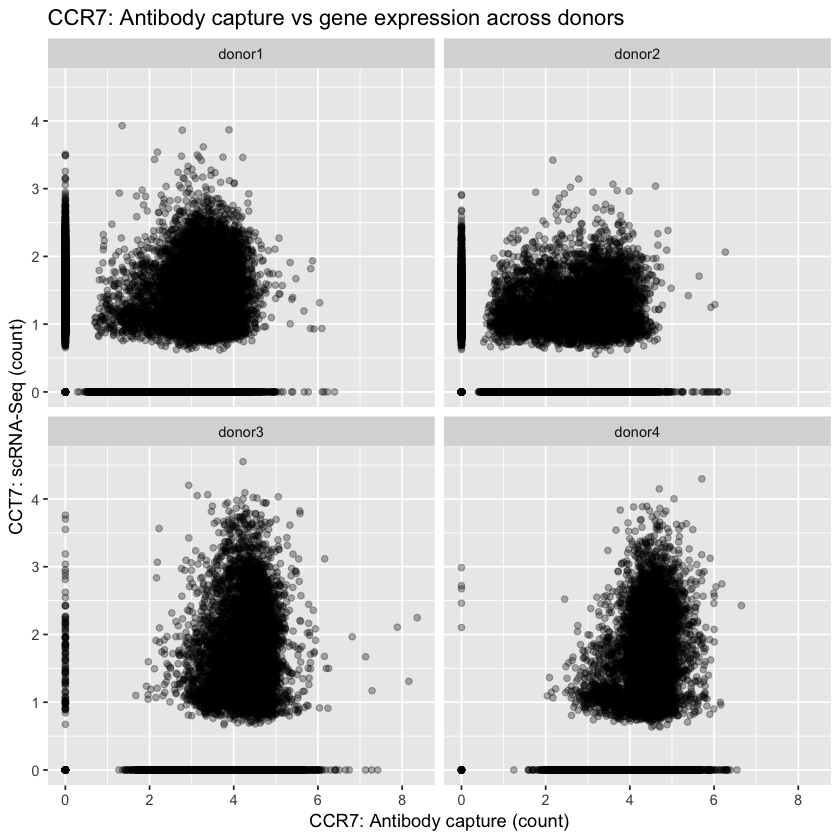

In [30]:
ggplot(
    ccr7_ab_gex,
    aes(x=`CCR7_ab`, y=`CCR7_gex`)
) +
geom_point(alpha=.3) +
facet_wrap(~`donor`, ncol=2) +
labs(
    x='CCR7: Antibody capture (count)',
    y='CCT7: scRNA-Seq (count)',
    title="CCR7: Antibody capture vs gene expression across donors"
)

In [37]:
plotGene <- function(gene, abname) {
    ab_matrix <- GetAssayData(object = all_ab_filtered, slot = "data")
    gene_ab <- ab_matrix[sprintf('%s-TotalSeqC', abname), ]
    gene_gex <- GetAssayData(object = all_gex_filtered, slot = "data")[gene, ]
    gex_ab_cells <- intersect(names(gene_gex), names(gene_ab))
    gene_ab_gex <-
        tibble(
            `cell`=gex_ab_cells,
            `gene_ab`=gene_ab[gex_ab_cells],
            `gene_gex`=gene_gex[gex_ab_cells]
        ) %>%
        separate(`cell`, c('donor', 'cell_barcode'), sep="_") %>%
        mutate(`donor`=factor(`donor`))
    ggplot(
        gene_ab_gex,
        aes(x=`gene_ab`, y=`gene_gex`)
    ) +
    geom_point(alpha=.3) +
    facet_wrap(~`donor`, ncol=2) +
    labs(
        x=sprintf('%s: Antibody capture (count)', gene),
        y=sprintf('%s: scRNA-Seq (count)', gene),
        title=sprintf("%s: Antibody capture vs gene expression across donors", gene)
    )

}

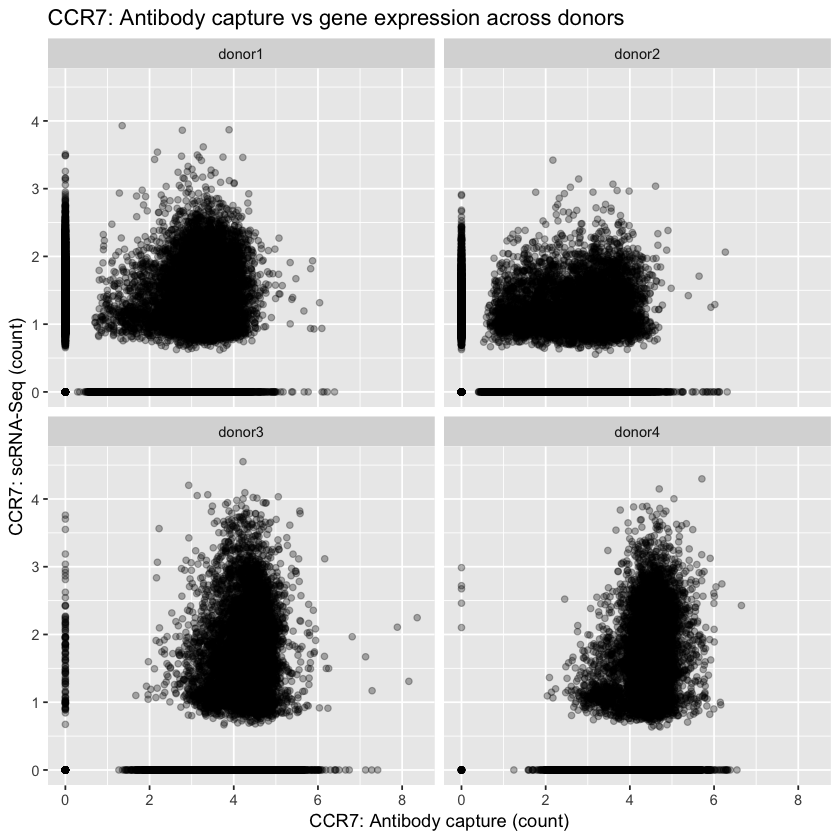

In [38]:
plotGene('CCR7', 'CCR7')

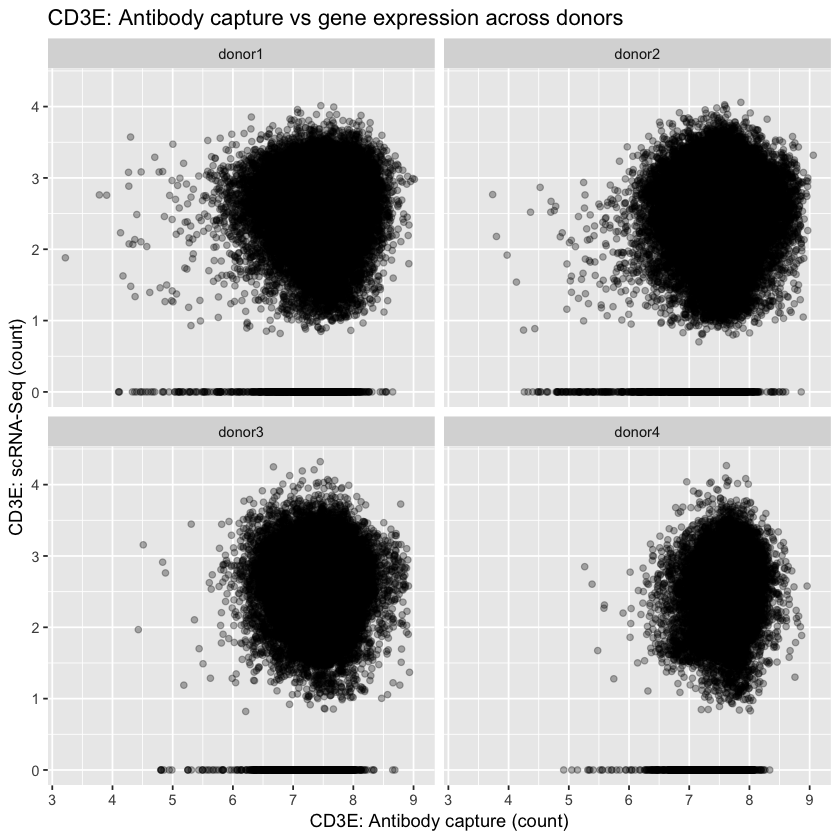

In [40]:
plotGene('CD3E', 'CD3')

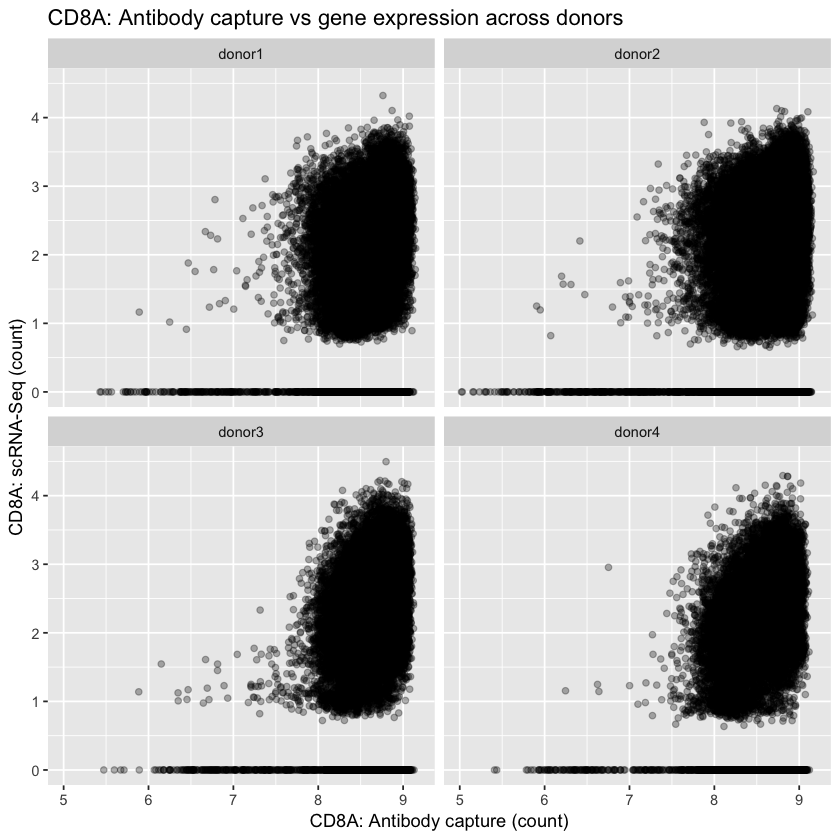

In [41]:
plotGene('CD8A', 'CD8a')

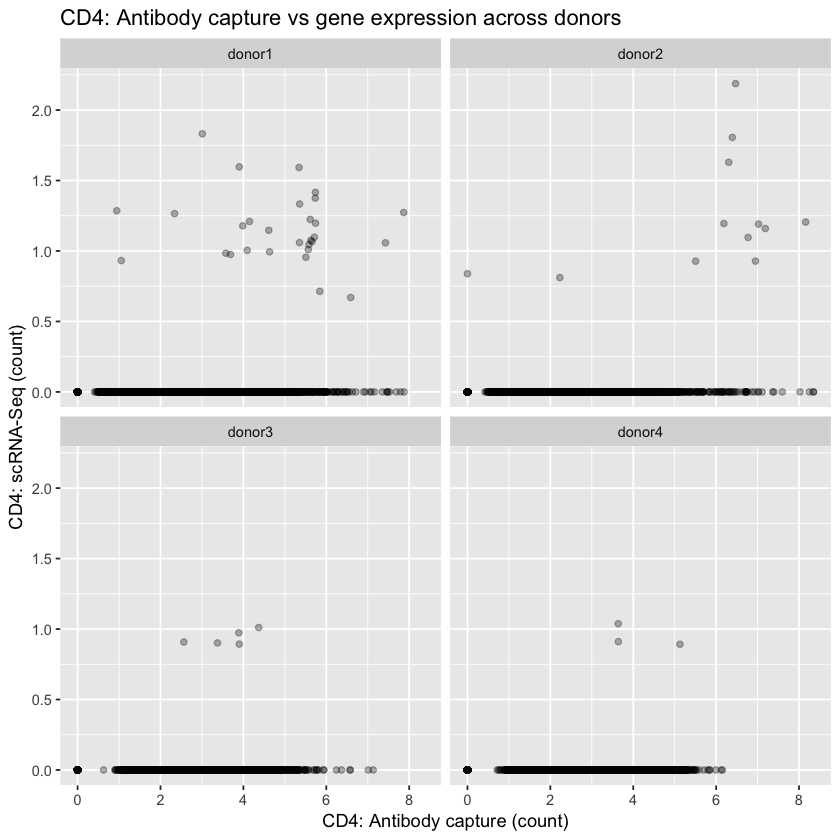

In [43]:
plotGene('CD4', 'CD4')